In [1]:
import pandas as pd

In [2]:
brasilia2003 = pd.read_csv("arquivos/INMET_CO_DF_A001_BRASILIA_01-01-2003_A_31-12-2003.CSV", encoding='latin1', decimal=',', sep=';', skiprows=8)
brasilia2013 = pd.read_csv("arquivos/INMET_CO_DF_A001_BRASILIA_01-01-2013_A_31-12-2013.CSV",  encoding='latin1', decimal=',', sep=';', skiprows=8)
brasilia2023 = pd.read_csv('arquivos/INMET_CO_DF_A001_BRASILIA_01-01-2023_A_31-12-2023.CSV',  encoding='latin1', decimal=',', sep=';', skiprows=8)


Padronizando as colunas

In [3]:
brasilia2023.rename(columns={'Data':'DATA (YYYY-MM-DD)', 'Hora UTC':'HORA (UTC)', 'RADIACAO GLOBAL (Kj/m²)': 'RADIACAO GLOBAL (KJ/m²)'}, inplace=True)
brasilia2023['DATA (YYYY-MM-DD)'] = pd.to_datetime(brasilia2023['DATA (YYYY-MM-DD)'], format="%Y/%m/%d", errors='coerce')


Gerando MultiIndex de Ano, Meses e Dias

In [4]:
brasilia = pd.concat([brasilia2003, brasilia2013, brasilia2023])
brasilia['DATA (YYYY-MM-DD)'] = pd.to_datetime(brasilia['DATA (YYYY-MM-DD)'])
brasilia["HORA (UTC)"] = brasilia["HORA (UTC)"].apply(lambda x: int(str(x)[0:2]))
brasilia.set_index(["DATA (YYYY-MM-DD)"],inplace=True)
brasilia

,HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
DATA (YYYY-MM-DD),,,,,,,,,,,,,,,,,,,
2003-01-01,0,0.0,886.9,887.0,886.5,-9999.0,20.3,18.8,20.4,20.2,18.9,18.7,91.0,90.0,91.0,308.0,2.1,1.4,NaN
2003-01-01,1,0.0,887.3,887.3,886.9,-9999.0,19.9,18.5,20.3,19.9,18.8,18.5,92.0,91.0,92.0,302.0,2.2,1.3,NaN
2003-01-01,2,0.0,887.8,887.8,887.3,-9999.0,19.8,18.5,20.1,19.8,18.8,18.4,92.0,92.0,92.0,302.0,2.7,1.6,NaN
2003-01-01,3,0.0,886.9,887.8,886.9,-9999.0,19.5,18.5,19.8,19.5,18.6,18.4,94.0,92.0,94.0,295.0,3.4,2.0,NaN
2003-01-01,4,0.0,886.8,886.9,886.7,-9999.0,19.2,18.0,19.5,19.2,18.5,18.0,94.0,93.0,93.0,313.0,3.9,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,19,0.0,884.2,885.2,884.2,1252.2,26.1,18.4,28.1,26.0,19.0,16.9,64.0,52.0,63.0,1.0,5.3,2.1,NaN
2023-12-31,20,0.0,883.7,884.3,883.7,1178.8,27.7,18.1,27.7,25.8,18.2,16.9,62.0,53.0,56.0,314.0,5.2,1.9,NaN
2023-12-31,21,0.0,883.5,883.7,883.4,873.0,25.5,17.4,27.7,25.5,18.0,16.9,62.0,52.0,61.0,300.0,5.1,2.7,NaN


In [5]:
mi = []
for columns in brasilia.columns:
    a = (columns,"")
    if(columns.find("PRESSAO")>-1 or columns.find("PRESSÃO")>-1):
        a = ("Pressão",columns)
    if(columns.find("TEMPERATURA")>-1):
        a = ("Temperatura",columns)
    if(columns.find("UMIDADE")>-1):
        a = ("Umidade",columns)
    if(columns.find("VENTO")>-1):
        a = ("Velocidade do Vento",columns)
    if(columns.find("PRECIPITAÇÃO")>-1):
        a = ("Precipitação",columns)
    mi.append(a)
brasilia.columns = pd.MultiIndex.from_tuples(mi)
brasilia

HORA (UTC)                     Precipitação  \
                             PRECIPITAÇÃO TOTAL, HORÁRIO (mm)   
DATA (YYYY-MM-DD)                                               
2003-01-01                 0                              0.0   
2003-01-01                 1                              0.0   
2003-01-01                 2                              0.0   
2003-01-01                 3                              0.0   
2003-01-01                 4                              0.0   
...                      ...                              ...   
2023-12-31                19                              0.0   
2023-12-31                20                              0.0   
2023-12-31                21                              0.0   
2023-12-31                22                              0.0   
2023-12-31                23                              0.0   

                                                                Pressão  \
                  PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   
DATA (YYYY-MM-DD)                                                         
2003-01-01                                                     886.9      
2003-01-01                                                     887.3      
2003-01-01                                                     887.8      
2003-01-01                                                     886.9      
2003-01-01                                                     886.8      
...                                                              ...      
2023-12-31                                                     884.2      
2023-12-31                                                     883.7      
2023-12-31                                                     883.5      
2023-12-31                                                     884.5      
2023-12-31                                                     885.3      

                                                                   \
                  PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)   
DATA (YYYY-MM-DD)                                                   
2003-01-01                                                  887.0   
2003-01-01                                                  887.3   
2003-01-01                                                  887.8   
2003-01-01                                                  887.8   
2003-01-01                                                  886.9   
...                                                           ...   
2023-12-31                                                  885.2   
2023-12-31                                                  884.3   
2023-12-31                                                  883.7   
2023-12-31                                                  884.5   
2023-12-31                                                  885.3   

                                                                    \
                  PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)   
DATA (YYYY-MM-DD)                                                    
2003-01-01                                                   886.5   
2003-01-01                                                   886.9   
2003-01-01                                                   887.3   
2003-01-01                                                   886.9   
2003-01-01                                                   886.7   
...                                                            ...   
2023-12-31                                                   884.2   
2023-12-31                                                   883.7   
2023-12-31                                                   883.4   
2023-12-31                                                   883.5   
2023-12-31                                                   884.5   

                  RADIACAO GLOBAL (KJ/m²)  \
                                            
DATA (YYYY-MM-DD) 

In [6]:
brasilia.groupby([brasilia.index.year, brasilia.index.month])['Temperatura'].agg(["mean"])

Temperatura  \
                                    TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)   
                                                                            mean   
DATA (YYYY-MM-DD) DATA (YYYY-MM-DD)                                                
2003              1                                                  -341.878226   
                  2                                                  -469.978274   
                  3                                                 -1635.521505   
                  4                                                 -1230.695556   
                  5                                                  -411.044220   
                  6                                                  -258.561111   
                  7                                                     5.627285   
                  8                                                 -1473.877419   
                  9                                                  -214.002917   
                  10                                                 -206.623656   
                  11                                                 -201.205972   
                  12                                                 -381.327957   
2013              1                                                    21.148522   
                  2                                                    22.724405   
                  3                                                  -220.296640   
                  4                                                    20.795000   
                  5                                                    20.586022   
                  6                                                    -7.825000   
                  7                                                    19.638575   
                  8                                                    20.979570   
                  9                                                    22.446111   
                  10                                                   21.890054   
                  11                                                   21.668056   
                  12                                                   21.240995   
2023              1                                                    21.033602   
                  2                                                    22.744643   
                  3                                                    21.553898   
                  4                                                    21.026944   
                  5                                                    20.026882   
                  6                                                    19.254306   
                  7                                                    19.698522   
                  8                                                    21.764016   
                  9                                                    24.379444   
                  10                                                   24.509312   
                  11                                                   24.263750   
                  12                                                   23.332124   

                                                                          \
                                    TEMPERATURA DO PONTO DE ORVALHO (°C)   
                                                                    mean   
DATA (YYYY-MM-DD) DATA (YYYY-MM-DD)                                        
2003              1                                          -345.802823   
                  2                                          -475.284673   
                  3                                         -1638.654973   
                  4                                         -1235.389444   
                  5                                          -417.427823   
                  6     

In [7]:
plotBrasilia = brasilia.groupby([brasilia.index.year, brasilia.index.month])['Precipitação'].cumsum()
plotBrasilia.head()

,Precipitação
,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"
DATA (YYYY-MM-DD),
2003-01-01,0.0
2003-01-01,0.0
2003-01-01,0.0
2003-01-01,0.0
2003-01-01,0.0


In [8]:
import matplotlib.pyplot as plt

1. Analisando as colunas relacionadas e precipitações e temperaturas, mostre num subplot a evolução das temperaturas médias e acumulado de precipitações nos tres anos.

/tmp/ipykernel_10182/2644547309.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)
/tmp/ipykernel_10182/2644547309.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,2)


<Axes: >

<Figure size 640x480 with 0 Axes>

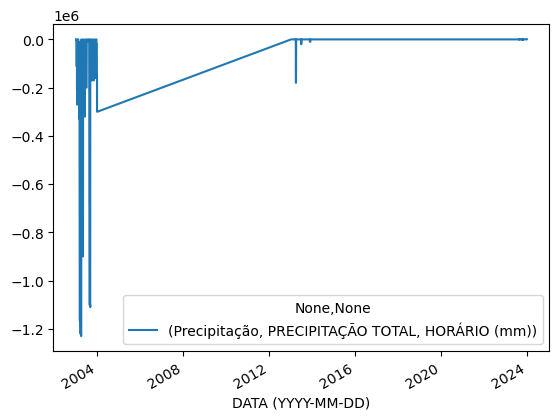

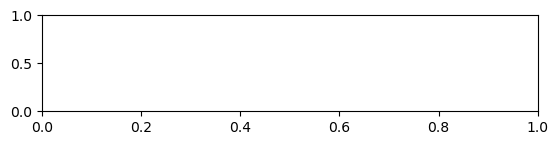

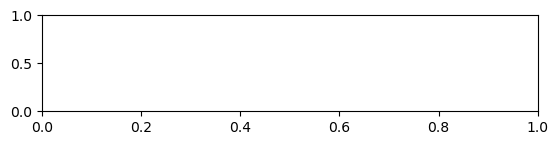

In [9]:
plt.figure()
plotBrasilia.plot()

plotBrasilia[plotBrasilia.index.year==2003].plot()
plt.subplot(3,1,1)

plotBrasilia[plotBrasilia.index.year==2013].plot()
plt.subplot(3,1,2)

2. Prepare um gráfico que mostre como foi o acumulado de precipitações de Junho nos três anos.

3.Prepare um gráfico que mostre como foi a temperatura media de cada um dos dias de Março nos três anos.